In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
#os.listdir('../Faces files')

In [4]:
detections_path = '../../../../mnt/DATA/datasets/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/face_detection_results_1_HQ.npy'
data = np.load(detections_path, allow_pickle=True)[0]
#data = pd.read_json('../Faces files/rom_pes_faces_2.json')
# data.loc[data['action_name']=='Corner']
data

{'00001': {},
 '00002': {},
 '00003': {},
 '00004': {},
 '00005': {},
 '00006': {},
 '00007': {},
 '00008': {},
 '00009': {},
 '00010': {},
 '00011': {},
 '00012': {},
 '00013': {},
 '00014': {},
 '00015': {},
 '00016': {},
 '00017': {},
 '00018': {},
 '00019': {},
 '00020': {},
 '00021': {},
 '00022': {},
 '00023': {},
 '00024': {},
 '00025': {},
 '00026': {},
 '00027': {},
 '00028': {},
 '00029': {},
 '00030': {},
 '00031': {},
 '00032': {},
 '00033': {},
 '00034': {},
 '00035': {},
 '00036': {},
 '00037': {},
 '00038': {},
 '00039': {},
 '00040': {},
 '00041': {},
 '00042': {},
 '00043': {},
 '00044': {},
 '00045': {},
 '00046': {},
 '00047': {},
 '00048': {},
 '00049': {},
 '00050': {},
 '00051': {},
 '00052': {},
 '00053': {},
 '00054': {},
 '00055': {},
 '00056': {},
 '00057': {},
 '00058': {},
 '00059': {},
 '00060': {},
 '00061': {},
 '00062': {},
 '00063': {},
 '00064': {},
 '00065': {},
 '00066': {},
 '00067': {},
 '00068': {},
 '00069': {},
 '00070': {},
 '00071': {},
 '0007

# Plots related to the number of faces by action

In [16]:
df1 = data.copy().reset_index(drop=True)
df1['action_faces'] = df1['face_locations'].str.len()


In [17]:
# Number of faces by every action in the match
df1 = df1[['action_position','action_name','action_time','action_faces']]
count1 = df1.groupby(['action_position','action_name','action_time'], as_index=False, sort=False).sum()
count1.loc[count1['action_name'] == 'Corner']

,action_position,action_name,action_time,action_faces
15,393802,Corner,1 - 06:33,91
38,1091017,Corner,1 - 18:11,59
45,1259566,Corner,1 - 20:59,47
52,1395350,Corner,1 - 23:15,43
62,1671111,Corner,1 - 27:51,34
103,2544401,Corner,1 - 42:24,23
138,481857,Corner,2 - 08:01,13
148,572863,Corner,2 - 09:32,41
187,1373334,Corner,2 - 22:53,49
206,1808519,Corner,2 - 30:08,77


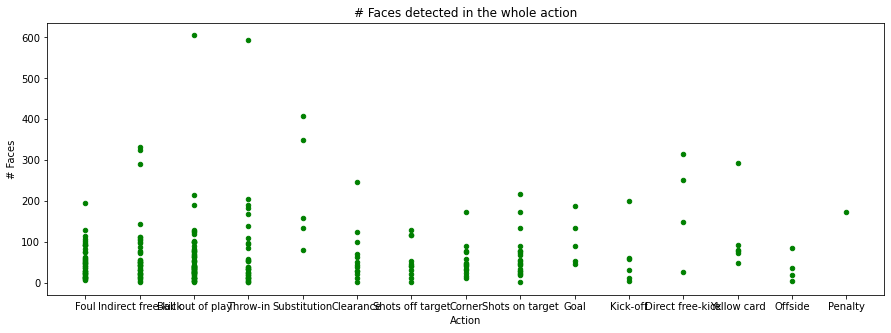

In [18]:
count1.plot(kind='scatter',x='action_name', y='action_faces',color='green', figsize=(15,5), 
           title = '# Faces detected in the whole action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

In [19]:
# Number of faces by frame, of every action in the match
df2 = data.copy().reset_index(drop=True)
df2['frame_faces'] = df2['face_locations'].str.len()

count2 = df2[['action_name','action_time','action_position','current_frame','frame_faces']]
count2.loc[count2['action_name']=='Corner'].head()

,action_name,action_time,action_position,current_frame,frame_faces
645,Corner,1 - 06:33,393802,3073,1
646,Corner,1 - 06:33,393802,3078,1
647,Corner,1 - 06:33,393802,3079,1
648,Corner,1 - 06:33,393802,3080,1
649,Corner,1 - 06:33,393802,3081,1


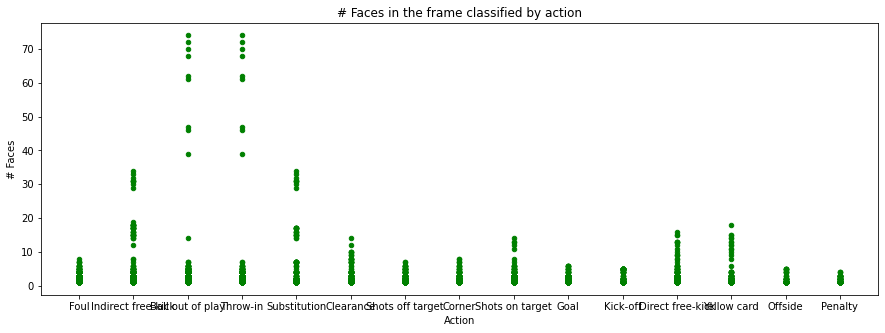

In [20]:
count2.plot(kind='scatter',x='action_name', y='frame_faces',color='green', figsize=(15,5), 
           title = '# Faces in the frame classified by action', xlabel='Action', ylabel='# Faces')
plt.xlabel('Action')
plt.ylabel('# Faces')
plt.show()

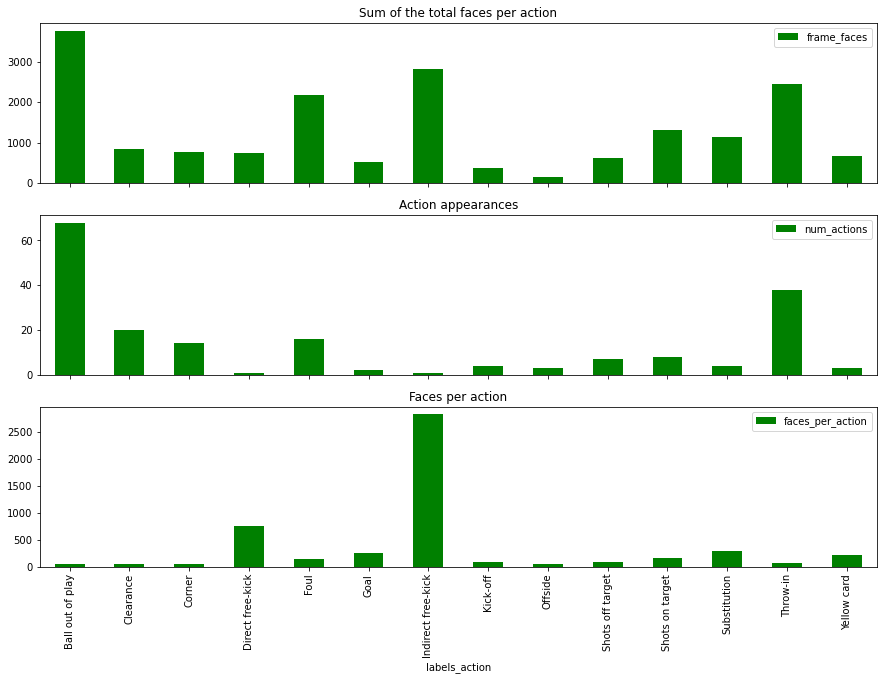

In [25]:
# Relation between total faces by action and times that the action apears
df3 = data.copy()
df3['frame_faces'] = df3['face_locations'].str.len()
df3 = df3[['action_name','frame_faces']]
count3 = df3.groupby(['action_name'], as_index=False).sum()

import json
# change directory (adria's computer path to labels file)
# add labels path for roma - pescara
json_path = '../../josep-main/data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v2.json'
with open(json_path) as f:
    ann = json.load(f)
    
an_df = pd.DataFrame(ann['annotations'])
#an_df = an_df.loc[an_df['gameTime'].str[:1]=='2'] # comment line if both parts
an_df = an_df[['label']]
an_df['num']=1
count4 = an_df.groupby(['label'], as_index=False).sum().rename(columns={'label':'labels_action','num':'num_actions'})

a = pd.merge(count3,count4,left_on='action_name',right_on='labels_action',how='inner')
a['faces_per_action'] = a['frame_faces'] / a['num_actions']

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

a.plot(kind='bar',x='action_name',y='frame_faces',color='green', figsize=(15,15),
       title='Sum of the total faces per action', ax=axes[0])

a.plot(kind='bar',x='labels_action',y='num_actions',color='green', figsize=(15,15),
       title='Action appearances', ax=axes[1])

a.plot(kind='bar',x='labels_action',y='faces_per_action',color='green', figsize=(15,10),
       title='Faces per action',ax=axes[2])

plt.show()

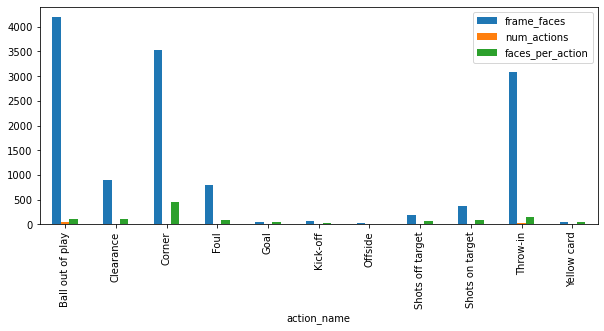

In [44]:
a.plot(kind='bar', x='action_name',figsize=(10,4))
plt.show()

# Plots and information related to WHEN the faces are detected

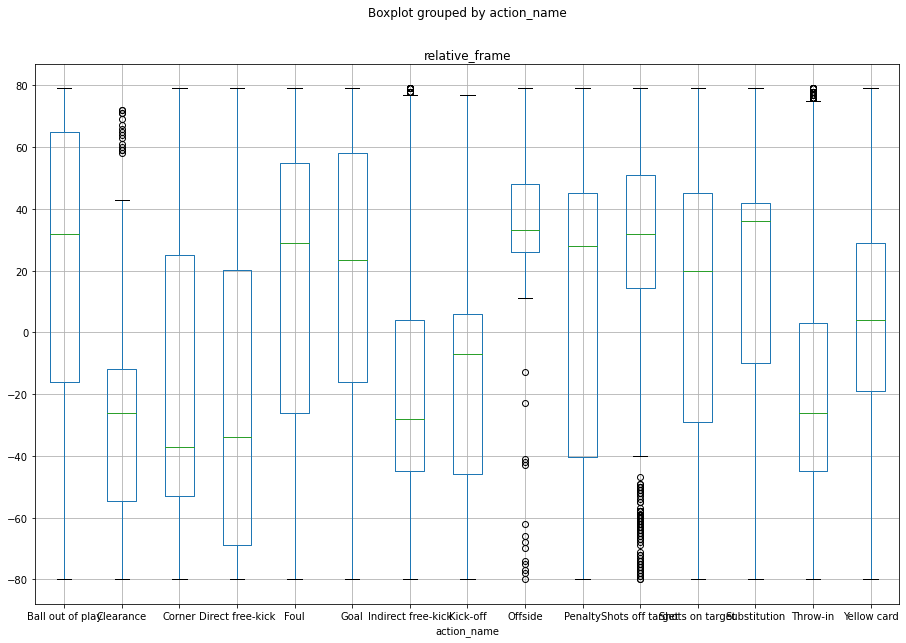

,action_name,action_time,action_position,relative_frame
1049,Goal,1 - 06:37,397720,-80
1050,Goal,1 - 06:37,397720,-68
1051,Goal,1 - 06:37,397720,-67
1052,Goal,1 - 06:37,397720,-66
1053,Goal,1 - 06:37,397720,-64
...,...,...,...,...
14336,Goal,2 - 28:17,1697920,79
14337,Goal,2 - 28:17,1697920,79
14338,Goal,2 - 28:17,1697920,79
14339,Goal,2 - 28:17,1697920,79


In [26]:
dfw = data.copy()
dfw['frame_faces'] = dfw['face_locations'].str.len()
dfw['relative_frame'] = dfw['current_frame'] - dfw['action_frame']


dfw = dfw.loc[dfw.index.repeat(dfw.frame_faces)].reset_index(drop=True)
dfw = dfw[['action_name','action_time','action_position','relative_frame']]
dfw.boxplot(column='relative_frame',by='action_name', figsize=(15,10))
plt.show()
dfw.loc[dfw['action_name']=='Goal']


In [10]:
a = dfw.loc[dfw['action_name'] == 'Goal']
a

,action_name,action_time,action_position,relative_frame
5862,Goal,1 - 13:10,790722,25
5863,Goal,1 - 13:10,790722,26
5864,Goal,1 - 13:10,790722,28
5865,Goal,1 - 13:10,790722,29
5866,Goal,1 - 13:10,790722,30
5867,Goal,1 - 13:10,790722,32
5868,Goal,1 - 13:10,790722,52
5869,Goal,1 - 13:10,790722,55
5870,Goal,1 - 13:10,790722,63
5871,Goal,1 - 13:10,790722,63


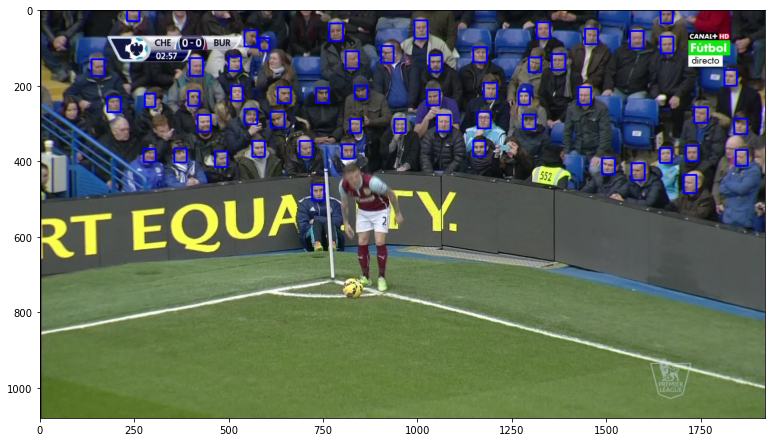

In [56]:
from skimage import io
import cv2

g = data.loc[data['action_name'] == 'Corner']
face_locations = g.loc[g['current_frame'] == 1422]['face_locations']

image = io.imread('../../josep-main/data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps/01422.jpg')

if len(face_locations)>0:
    for face in face_locations.array[0]:
        cv2.rectangle(image, (face[0], face[1]), (face[0]+face[2],face[1]+face[3]), (0,0,255), 3)
        
    fig = plt.figure(figsize=(15,7.5)) 
    plt.imshow(image)
    plt.show() 
        


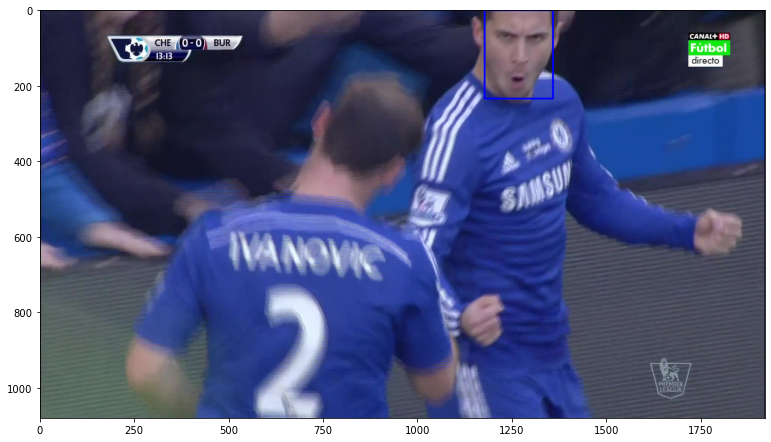

In [59]:
g = data.loc[data['action_name'] == 'Goal']
face_locations = g.loc[g['current_frame'] == 6345]['face_locations']
image = io.imread('../../josep-main/data/soccernet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/1_HQ/frames8fps/06345.jpg')

if len(face_locations)>0:
    for face in face_locations.array[0]:
        cv2.rectangle(image, (face[0], face[1]), (face[0]+face[2],face[1]+face[3]), (0,0,255), 3)
    fig = plt.figure(figsize=(15,7.5)) 
    plt.imshow(image)
    plt.show() 